In [1]:
from functions import cleanDF
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Read in the data
# mergedDF = pd.read_csv('../data/mergedClean.csv', index_col=0)
appDF = pd.read_csv('../data/app_nonull.csv')
subscriberDF = pd.read_csv('../data/subscriberClean.csv')

appDF = cleanDF(appDF)
subscriberDF = cleanDF(subscriberDF)

mergedDF = subscriberDF.merge(appDF, on='ID', how='left')
mergedDF = cleanDF(mergedDF)



appDF_start = appDF.copy()
subscriberDF_start = subscriberDF.copy()
fullDF_start = mergedDF.copy()
print(mergedDF.shape)
# print(mergedDF.dtypes)
# mergedDF.head()

(784204, 27)


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load data into a pandas dataframe
df = pd.read_csv('../data/subscriberClean.csv')

from functions import cleanDF
df = cleanDF(df)

# Preprocess datetime columns
date_cols = ['Subscription Start Date', 'Subscription Expiration', 'Free Trial Start Date', 'Free Trial Expiration']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

df['Subscription Start Year'] = df['Subscription Start Date'].dt.year
df['Subscription Start Month'] = df['Subscription Start Date'].dt.month
df['Subscription Start Day'] = df['Subscription Start Date'].dt.day
df['Subscription Start Hour'] = df['Subscription Start Date'].dt.hour

# Drop original datetime columns
df.drop(columns=date_cols, inplace=True)

# One-hot encode categorical columns
cat_cols = ['Language', 'Subscription Type', 'Subscription Event Type', 'Purchase Store', 'Currency', 'Country', 'User Type', 'Lead Platform']
for col in cat_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    df.drop(col, axis=1, inplace=True)

# Impute missing values with column mean
df["Purchase Amount"].fillna(0, inplace=True)
X = df.fillna(df.mean()).to_numpy()
print(df.isna().sum())

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define number of clusters
n_clusters = 4

# Initialize SpectralClustering algorithm
sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_jobs=-1)

# Fit the data to the algorithm
sc.fit(X)

# Add cluster labels to the dataframe
df['Cluster'] = sc.labels_

# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


ID                       0
Purchase Amount          0
Demo User                0
Free Trial User          0
Auto Renew               0
                        ..
User Type_Consumer       0
User Type_Other          0
Lead Platform_App        0
Lead Platform_Unknown    0
Lead Platform_Web        0
Length: 146, dtype: int64


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


                   ID  Purchase Amount  Demo User  Free Trial User  \
Cluster                                                              
0        19931.921435        47.106623        1.0              1.0   
1        23387.537855        29.320262        1.0              1.0   
2        18398.097561        51.844841        1.0              1.0   
3        10559.100000        65.260561        1.0              1.0   

         Auto Renew  Email Subscriber  Push Notifications  Send Count  \
Cluster                                                                 
0          0.353795               1.0                 1.0   23.269216   
1          0.525237               1.0                 1.0    6.553628   
2          0.341463               1.0                 1.0    6.609756   
3          1.000000               1.0                 1.0    0.750000   

         Open Count  Click Count  Unique Open Count  Unique Click Count  \
Cluster                                                          

In [6]:
# number of rows per cluster
print(df.groupby('Cluster').size())

KeyError: 'Cluster'

In [ ]:
df.to_csv('../data/cluster_spectral.csv', index=False)

In [ ]:
subscriberDF.dtypes

In [7]:
# find segments in the data

# # print list of numeric columns
# print(mergedDF.select_dtypes(include=['number']).columns.tolist())
# # print list of categorical columns
# print(mergedDF.select_dtypes(include=['category']).columns.tolist())
# # print list of boolean columns
# print(mergedDF.select_dtypes(include=['bool']).columns.tolist())
# # print list of datetime columns
# print(mergedDF.select_dtypes(include=['datetime']).columns.tolist())

mNumeric = mergedDF.select_dtypes(include=['number']).columns.tolist()
mCategorical = mergedDF.select_dtypes(include=['category']).columns.tolist()
mBoolean = mergedDF.select_dtypes(include=['bool']).columns.tolist()
mDatetime = mergedDF.select_dtypes(include=['datetime']).columns.tolist()


# mergedDF.dtypes

c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 2: 29539.753221174637


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 3: 29539.753221174637


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 4: 29539.753221174637


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 5: 29539.753221174637


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 6: 29539.753221174637


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 7: 29539.753221174637


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 8: 29539.753221174637


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k = 9: 29539.753221174637


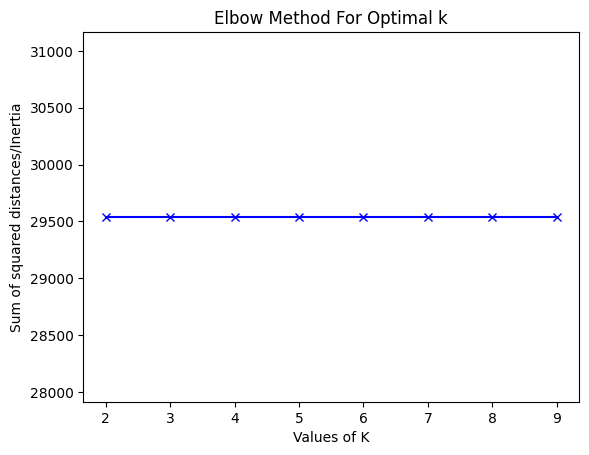

In [14]:
# elbow plot
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

# Load data into a pandas dataframe
df = subscriberDF_start.copy()

# Encode categorical variables using LabelEncoder
cat_cols = ['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select relevant columns for clustering
X = df[['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']]

# Normalize the data using z-scoring
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
# silhoeuttes = []
K = range(2,10)
for num_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)
    inertias.append(kmeans.inertia_)
    # silhoeuttes.append(silhouette_score(X_scaled, kmeans.labels_))
    # print("Silhouette score for k = {}: {}".format(num_clusters, silhoeuttes[num_clusters-1]))
    print("Inertia for k = {}: {}".format(num_clusters, kmeans.inertia_))
# plt.plot(K,silhoeuttes,'bx-')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
## TEST
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load data into a pandas dataframe
df = subscriberDF_start.copy()

# Encode categorical variables using LabelEncoder
cat_cols = ['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select relevant columns for clustering
X = df[['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']]

# Normalize the data using z-scoring
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Sum_of_squared_distances = []
# Define number of clusters
for n_clusters in range(1,10):
    # Fit KMeans clustering algorithm on the scaled data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)


# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Load data into a pandas dataframe
df = subscriberDF_start.copy()

# Encode categorical variables using LabelEncoder
cat_cols = ['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select relevant columns for clustering
X = df[['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']]

# Normalize the data using z-scoring
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define number of clusters
n_clusters = 4

# Fit KMeans clustering algorithm on the scaled data
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


                   ID   Language  Subscription Type  Purchase Amount  \
Cluster                                                                
0        14967.776729  10.023256           0.989895        43.985715   
1        29306.433555  10.339147           0.988152        43.269752   
2        16549.658648  10.239867           0.991509        36.442080   
3        20466.205968   1.445645           0.000000       190.868307   

         Demo User  Free Trial User  Auto Renew    Country  User Type  \
Cluster                                                                 
0              1.0              1.0    0.449662  41.853258   0.000000   
1              1.0              1.0    0.403886  37.678199   1.000000   
2              1.0              1.0    0.403417  38.519964   0.000000   
3              1.0              1.0    0.000806  40.590323   0.396935   

         Lead Platform  Email Subscriber  Push Notifications  Send Count  \
Cluster                                             

c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\austi\AppData\Local\Temp\ipykernel_12372\635865344.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


In [16]:
print(df['Cluster'].value_counts())
print(df.isna().sum())

# df.to_csv('../data/clustered_kmeans.csv', index=False)

0    13459
1    10550
2     9893
3     6200
Name: Cluster, dtype: int64
ID                             0
Language                       0
Subscription Type              0
Subscription Event Type        0
Purchase Store                 0
Purchase Amount            13179
Currency                   13178
Subscription Start Date        0
Subscription Expiration        0
Demo User                      0
Free Trial User                0
Free Trial Start Date      34269
Free Trial Expiration      34269
Auto Renew                     0
Country                        0
User Type                      0
Lead Platform                  0
Email Subscriber               0
Push Notifications             0
Send Count                     0
Open Count                     0
Click Count                    0
Unique Open Count              0
Unique Click Count             0
Cluster                        0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data into a pandas dataframe
df = subscriberDF_start.copy()

# Encode categorical variables using LabelEncoder
cat_cols = ['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select relevant columns for clustering
X = df[['Language', 'Subscription Type', 'Country', 'User Type', 'Lead Platform']]

# Perform hierarchical clustering using Ward linkage and euclidean distance metric
Z = linkage(X, 'ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, leaf_rotation=90., leaf_font_size=12., color_threshold=8, above_threshold_color='gray')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Dendrogram of Subscriber Segments')
plt.show()

# Fit Agglomerative Clustering algorithm on the data
n_clusters = 4
ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = ac.fit_predict(X)

# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


In [ ]:
df.to_csv('../data/clustered_hierarchical.csv', index=False)

# old:

In [17]:
# perform PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# create a copy of the dataframe
subscriberDF_pca = subscriberDF_start.copy()[mNumeric]

# drop the ID column
subscriberDF_pca = subscriberDF_pca.drop(['ID'], axis=1)

# deal with null values
# find null values
print(subscriberDF.isnull().sum())

# purchase amount null values are because they were not purchases 
# fill with 0
subscriberDF_pca["Purchase Amount"].fillna(0, inplace=True)

# drop currency column
# subscriberDF_pca.drop(columns=['Currency'], inplace=True)
# drop free trial date columns
# subscriberDF_pca.drop(columns=['Free Trial Start Date', 'Free Trial Expiration'], inplace=True)
# drop country because we created it from currency
# subscriberDF_pca.drop(columns=['Country'], inplace=True)


print(subscriberDF_pca.isnull().sum()) # output showed no null values

# standardize the data
scaler = StandardScaler()
subscriberDF_pca = scaler.fit_transform(subscriberDF_pca)

# create the PCA instance
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(subscriberDF_pca)

# create a dataframe with the principal components
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# add the ID column back to the dataframe
principalDF['ID'] = subscriberDF_start['ID']

# merge the dataframes
subscriberPCA_DF = principalDF.merge(subscriberDF_start, on='ID', how='left')

# print the shape of the dataframe
print(subscriberPCA_DF.shape)

NameError: name 'mNumeric' is not defined

In [ ]:
#cluster using the pca data
from sklearn.cluster import KMeans

# create a copy of the dataframe
subscriberDF_cluster = subscriberPCA_DF.copy()

# drop the ID column
subscriberDF_cluster = subscriberDF_cluster.drop(['ID'], axis=1)

# create the kmeans instance
kmeans = KMeans(n_clusters=3)

# fit the data
kmeans.fit(subscriberDF_cluster)

# predict the labels of the clusters
label = kmeans.predict(subscriberDF_cluster)

# retrieve the centers of each cluster
centers = kmeans.cluster_centers_

# print the labels
print(label)

# create a dataframe with the labels and PC values
clusterDF = pd.DataFrame(data = label, columns = ['cluster'])
clusterDF['PC1'] = subscriberPCA_DF['PC1']
clusterDF['PC2'] = subscriberPCA_DF['PC2']

# plot the data
import matplotlib.pyplot as plt

plt.scatter(clusterDF['PC1'], clusterDF['PC2'], c=clusterDF['cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# use just the numeric columns
numericDF = subscriberDF[mNumeric].copy()


# find null values
print(numericDF.isnull().sum())

# all null values are in purchase columns, meaning they were not purchases
numericDF.fillna(0, inplace=True)


# scale the data
scaler = StandardScaler()
numericDF_scaled = scaler.fit_transform(numericDF)

# find the optimal number of clusters
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

# k means determine k
distortions = []
inertias = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(numericDF_scaled)
    distortions.append(kmeanModel.inertia_)
    inertias.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [ ]:
# use optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(numericDF_scaled)
numericDF['cluster'] = kmeans.labels_
numericDF['cluster'].value_counts()



In [ ]:
# cluster on categorical data
categoricalDF = mergedDF[mCategorical].copy()
# categoricalDF.fillna('missing', inplace=True)

# find null values
print(categoricalDF.isnull().sum())

from sklearn.cluster import 

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# hierarchical clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

subscriberDF = subscriberDF_start.copy()

# deal with null values
# find null values
print(subscriberDF.isnull().sum())

# purchase amount null values are because they were not purchases 
# fill with 0
subscriberDF["Purchase Amount"].fillna(0, inplace=True)

# drop currency column
subscriberDF.drop(columns=['Currency'], inplace=True)

# drop free trial date columns
subscriberDF.drop(columns=['Free Trial Start Date', 'Free Trial Expiration'], inplace=True)

# drop country because we created it from currency
subscriberDF.drop(columns=['Country'], inplace=True)

# drop ID column
subscriberDF.drop(columns=['ID'], inplace=True)

# check for null values
subscriberDF.isnull().sum()

In [ ]:
# perform hierarchical clustering

# use just the numeric columns except ID
numericDF = subscriberDF[mNumeric[1:]].copy()

# scale the data
scaler = StandardScaler()
numericDF_scaled = scaler.fit_transform(numericDF)

# start hierarchical clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

clustering = AgglomerativeClustering(n_clusters=3).fit(numericDF_scaled)
clustering.labels_

# add cluster labels to dataframe
subscriberDF['cluster'] = clustering.labels_
subscriberDF['cluster'].value_counts()


In [ ]:
# plot dendrogram
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(numericDF_scaled, 'ward')

# plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()



In [ ]:
subscriberDF_start.dtypes

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
subscriberDF = subscriberDF_start.copy()

# Remove the ID column since it's not useful for clustering
subscriberDF = subscriberDF.drop("ID", axis=1)

# Replace NaN values in numeric columns with 0, and categorical columns with the mode value
for col in subscriberDF.columns:
    if subscriberDF[col].dtype == "float64":
        subscriberDF[col] = subscriberDF[col].fillna(0)
    else:
        subscriberDF[col] = subscriberDF[col].fillna(subscriberDF[col].mode()[0])

# Scale the numeric columns
scaler = StandardScaler()
numeric_cols = subscriberDF.select_dtypes(include=[np.number]).columns.tolist()
subscriberDF[numeric_cols] = scaler.fit_transform(subscriberDF[numeric_cols])

# Convert the categorical columns to integer type
categorical_cols = subscriberDF.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    subscriberDF[col] = subscriberDF[col].cat.codes.astype(int)

# Choose the number of clusters
costs = []
for num_clusters in range(1, 10):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=2)
    kproto.fit(subscriberDF.to_numpy(), categorical=[col in categorical_cols for col in subscriberDF.columns])
    costs.append(kproto.cost_)
plt.plot(range(1, 10), costs)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

# Fit the model with the chosen number of clusters
kproto = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=2)
clusters = kproto.fit_predict(subscriberDF.to_numpy(), categorical=[col in categorical_cols for col in subscriberDF.columns])

# Visualize the results using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        x_col = numeric_cols[i*2+j]
        y_col = numeric_cols[(i+1)*2-1-j]
        axs[i][j].scatter(subscriberDF[x_col], subscriberDF[y_col], c=clusters)
        axs[i][j].set_xlabel(x_col)
        axs[i][j].set_ylabel(y_col)
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Load the data
subscriberDF = subscriberDF_start.copy()

# Remove the ID column since it's not useful for clustering
subscriberDF = subscriberDF.drop("ID", axis=1)

# Replace NaN values with the mode value
subscriberDF = subscriberDF.fillna(subscriberDF.mode().iloc[0])

# Convert the categorical columns to integer type
categorical_cols = subscriberDF.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    subscriberDF[col] = subscriberDF[col].cat.codes.astype(int)

# Choose the number of clusters
costs = []
for num_clusters in range(1, 10):
    kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=2)
    kmodes.fit(subscriberDF.to_numpy())
    costs.append(kmodes.cost_)
plt.plot(range(1, 10), costs)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

# Fit the model with the chosen number of clusters
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=2)
clusters = kmodes.fit_predict(subscriberDF.to_numpy())

# Visualize the results using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        x_col = categorical_cols[i*2+j]
        y_col = categorical_cols[(i+1)*2-1-j]
        axs[i][j].scatter(subscriberDF[x_col], subscriberDF[y_col], c=clusters)
        axs[i][j].set_xlabel(x_col)
        axs[i][j].set_ylabel(y_col)
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import cudf
import cupy
import matplotlib.pyplot as plt
from cuml.preprocessing import StandardScaler
from cuml.cluster import KMeans

# Load the data
subscriberDF = pd.read_csv("subscriber_data.csv")

# Remove the ID column since it's not useful for clustering
subscriberDF = subscriberDF.drop("ID", axis=1)

# Convert the categorical columns to integer type
categorical_cols = subscriberDF.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    subscriberDF[col] = subscriberDF[col].cat.codes.astype(int)

# Fill missing values with the mode value
subscriberDF = subscriberDF.fillna(subscriberDF.mode().iloc[0])

# Standardize the data
scaler = StandardScaler()
subscriberDF_scaled = scaler.fit_transform(subscriberDF.values.astype(np.float32))

# Convert the data to a cuDF dataframe
subscriberDF_cudf = cudf.DataFrame.from_gpu_matrix(cupy.asarray(subscriberDF_scaled))

# Choose the number of clusters
costs = []
for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means||', n_init=5, verbose=2)
    kmeans.fit(subscriberDF_cudf)
    costs.append(kmeans.inertia_)
plt.plot(range(1, 10), costs)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

# Fit the model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init='k-means||', n_init=5, verbose=2)
clusters = kmeans.fit_predict(subscriberDF_cudf)

# Visualize the results using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        x_col = categorical_cols[i*2+j]
        y_col = categorical_cols[(i+1)*2-1-j]
        axs[i][j].scatter(subscriberDF[x_col], subscriberDF[y_col], c=clusters.to_array())
        axs[i][j].set_xlabel(x_col)
        axs[i][j].set_ylabel(y_col)
plt.show()
